<a href="https://colab.research.google.com/github/AnimeshBasak-14/Abalone-dataset-to-build-a-sequential-model/blob/main/ML_%7C_Abalone_dataset_to_build_a_sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Dataset


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/abalone.csv')
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.shape


(4177, 9)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


Exploratory Data Analysis


In [ ]:
df.isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Now let’s check the distribution of the data in male, female and infant.



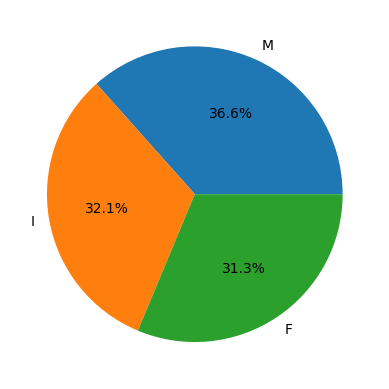

In [ ]:
x = df['Sex'].value_counts()
labels = x.index
values = x.values
plt.pie(values,
		labels=labels,
		autopct='%1.1f%%')
plt.show()


In [ ]:
df.groupby('Sex').mean()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


Here is an interesting observation that the life expectancy of the female abalone is higher than that of the male abalone. In the other features as well we can see that the height weight, as well as length in all the attributes of the numbers for female abalones, is on the higher sides.

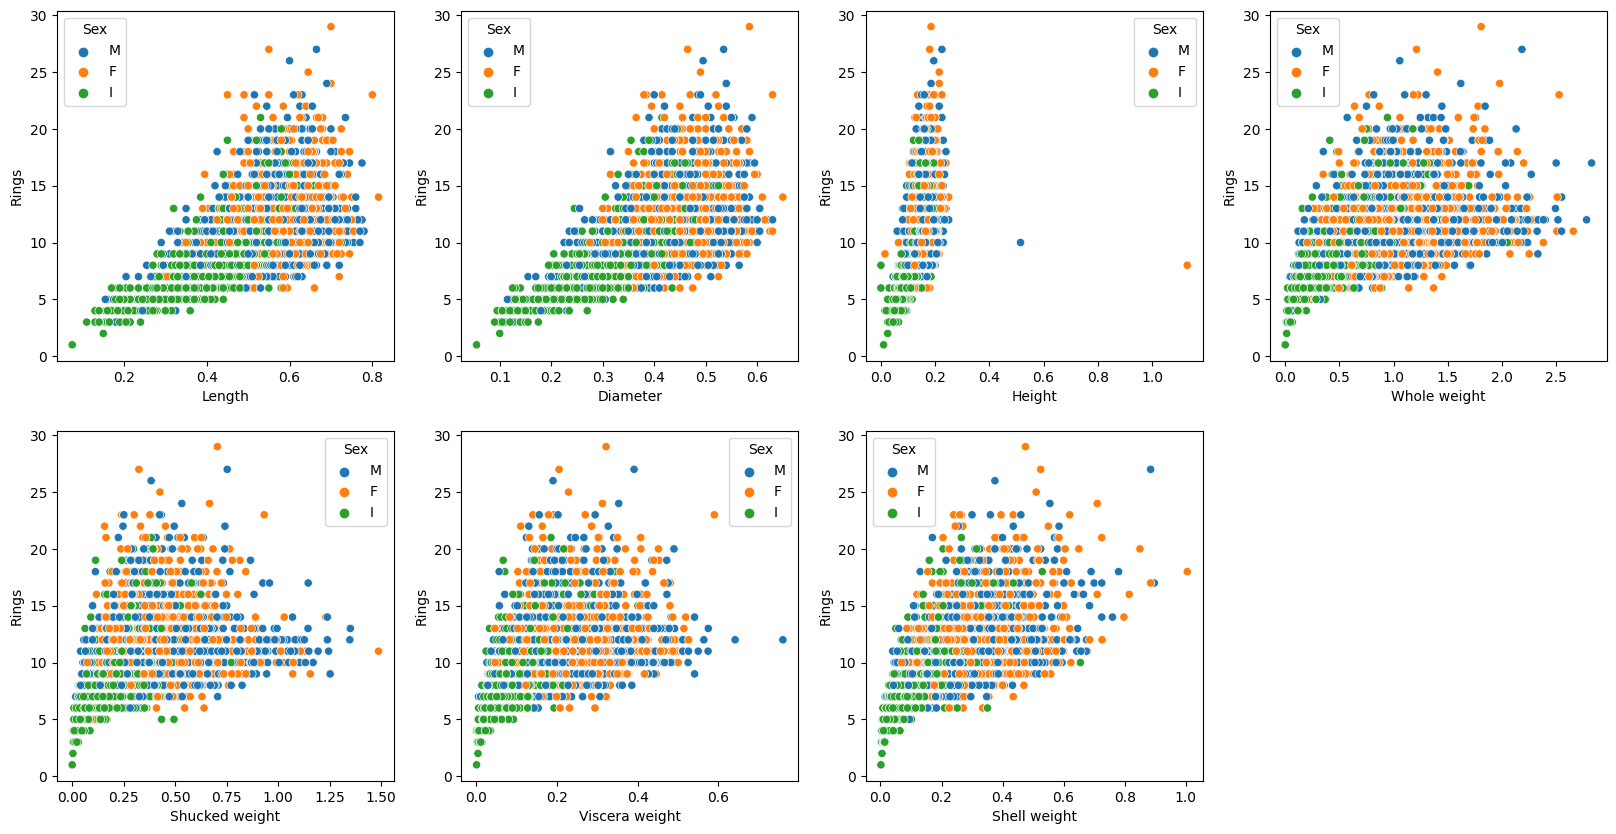

In [ ]:
features = df.loc[:, 'Length':'Shell weight'].columns
plt.subplots(figsize=(20, 10))
for i, feat in enumerate(features):
	plt.subplot(2, 4, i+1)
	sb.scatterplot(data=df, x=feat,
				y='Rings', hue='Sex')
plt.show()


Observations from the above graph are as follows:


*   A strong linear correlation between the age of the abalone and its height can be observed from the above graphs.
*   Length and Diameter have the same kind of relation with age that is up to a certain age length increases and after that it became constant. A similar kind of relationship is present between the weight and the age feature.





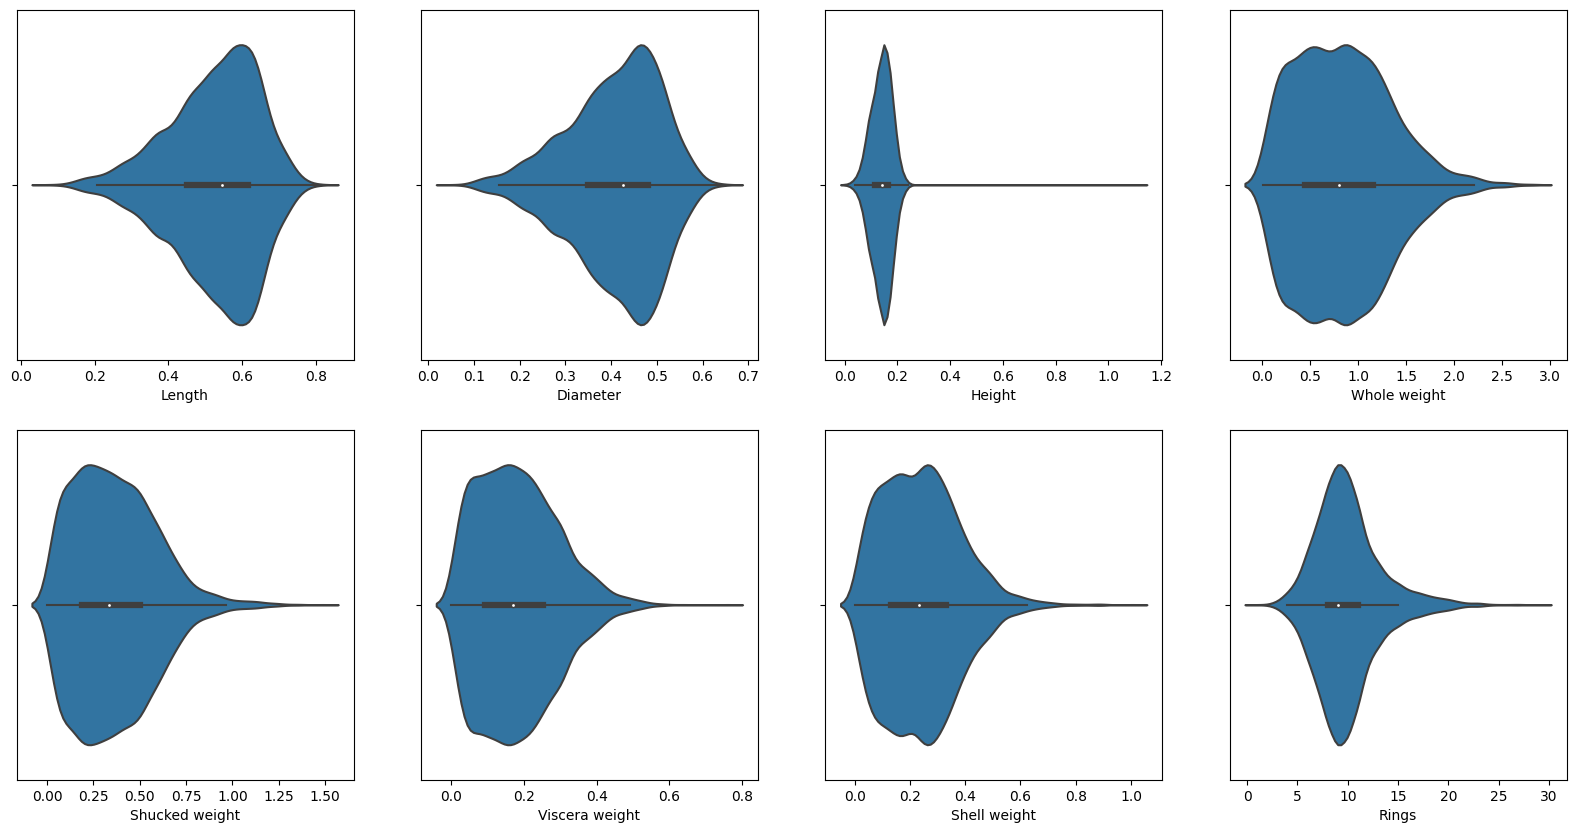

In [ ]:
plt.subplots(figsize=(20, 10))
for i, feat in enumerate(features):
	plt.subplot(2, 4, i+1)
	sb.violinplot(data=df, x=feat, hue='Sex')

plt.subplot(2, 4, 8)
sb.violinplot(data=df, x='Rings', hue='Sex')
plt.show()


In [ ]:
features = df.drop('Rings', axis=1)
target = df['Rings']

X_train, X_val,Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=22)

X_train.shape, X_val.shape


((3341, 8), (836, 8))

Model Architecture
We will implement a Sequential model which will contain the following parts:


*   We will have two fully connected layers.

*   We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer to avoid any possibility of overfitting.




In [ ]:
model = keras.Sequential([
	layers.Dense(256, activation='relu', input_shape=[8]),
	layers.BatchNormalization(),
	layers.Dense(256, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(1, activation='relu')
])

model.compile(
	loss='mae',
	optimizer='adam',
	metrics=['mape']
)


In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2304      
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_9 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
history = model.fit(X_train,
                    Y_train,
                    epochs=50,
                    verbose=1,
                    batch_size=64,
                    validation_data=(X_val, Y_val))


ValueError: ignored

In [ ]:
hist_df=pd.DataFrame(history.history)
hist_df.head()


NameError: ignored

In [ ]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()
plt.title('Loss v/s Validation Loss')
plt.legend()
plt.show()


In [ ]:
hist_df['mape'].plot()
hist_df['val_mape'].plot()
plt.title('MAPE v/s Validation MAPE')
plt.legend()
plt.show()
